In [11]:
import pandas as pd
import numpy as np
import talib
import matplotlib.pyplot as plt

%matplotlib inline

In [8]:
data_path = "../数据/future_price.csv"
df = pd.read_csv(data_path)
df['date'] = pd.to_datetime(df['date'])
df.name.unique()

array(['螺纹钢', '线材', '沪铜', '沪铝', '橡胶', '燃油', '沪锌', '黄金', '白银', '沥青',
       '热轧卷板', '沪镍', '沪铅', '原油', '沪锡', '纸浆', '豆一', '豆二', '玉米', '玉米淀粉',
       '乙二醇', '纤维板', '铁矿石', '焦炭', '鸡蛋', '焦煤', '塑料', '豆粕', '棕榈', 'PP',
       'PVC', '豆油', '鲜苹果', '棉花', '红枣', '棉纱', '玻璃', '粳稻', '晚籼稻', '郑醇',
       '菜油', '早籼稻', '菜粕', '菜籽', '硅铁', '锰硅', '白糖', 'PTA', '强麦', '动力煤'],
      dtype=object)

In [14]:
df = df[df.name=='螺纹钢']
df = df.set_index('date')
df.head()

,open,high,low,close,volume,code,name
date,,,,,,,
2009-03-27,3550.0,3663.0,3513.0,3561.0,354590,RB0,螺纹钢
2009-03-30,3550.0,3580.0,3528.0,3544.0,145168,RB0,螺纹钢
2009-03-31,3538.0,3566.0,3531.0,3549.0,70592,RB0,螺纹钢
2009-04-01,3560.0,3561.0,3543.0,3547.0,28100,RB0,螺纹钢
2009-04-02,3545.0,3548.0,3456.0,3473.0,235446,RB0,螺纹钢


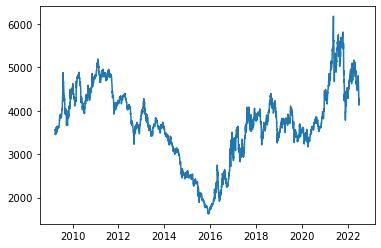

In [15]:
plt.plot(df['close'])

# SAR

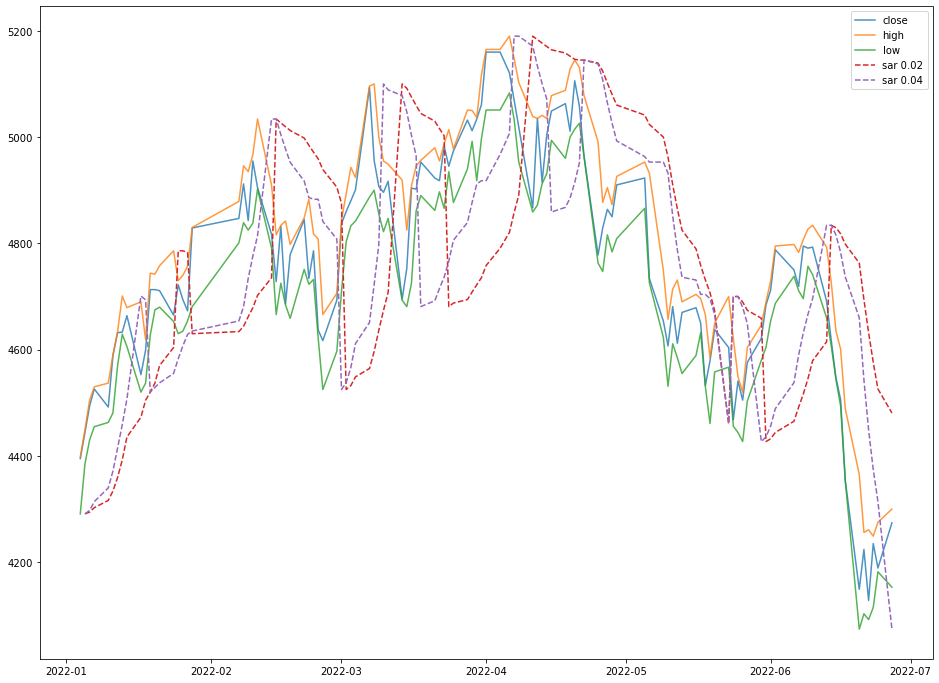

In [25]:
# SAR(high, low, acceleration=0, maximum=0)

d = df.loc['2022': ]
sar = talib.SAR(d['high'], d['low'], 0.02, 0.2)

_ = plt.subplots(figsize=(16, 12))
plt.plot(d['close'], label='close', alpha=0.8)
plt.plot(d['high'], label='high', alpha=0.8)
plt.plot(d['low'], label='low', alpha=0.8)
plt.plot(talib.SAR(d['high'], d['low'], 0.02, 0.2), label='sar 0.02', linestyle="--")
plt.plot(talib.SAR(d['high'], d['low'], 0.04, 0.2), label='sar 0.04', linestyle="--")

plt.legend()